# Bayesian Optimization

In [3]:
    # example of bayesian optimization for a 1d function from scratch
    from math import sin
    from math import pi
    from numpy import arange
    from numpy import vstack
    from numpy import argmax
    from numpy import asarray
    from numpy import sort
    from numpy.random import normal
    from numpy.random import random
    from scipy.stats import norm
    from sklearn.gaussian_process import GaussianProcessRegressor
    from warnings import catch_warnings
    from warnings import simplefilter
    from matplotlib import pyplot


pyplot.rcParams["figure.figsize"] = (10, 6)

# objective function
def objective_unimodal(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x ** 2 * sin(5 * pi * x) ** 6.0) + noise


def objective(x, noise=1.5):
    noise = normal(loc=0, scale=noise)
    return sin(10 * x) + noise


def surrogate(model, X):
    # surrogate or approximation for the objective function
    return model.predict(X, return_std=True)

# plot real observations vs surrogate function
def plot(X, y, model, title=''):
    pyplot.scatter(X, y, color='darkblue', alpha=0.5)
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples, color='green')
    pyplot.title(title, size=15)
    pyplot.show()


# optimize the acquisition function
def opt_acquisition(X, model):
    Xsamples = random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)

    yhat, _ = surrogate(model, X)  # calculate the acquisition function for each sample
    best = max(yhat)

    mu, std = surrogate(model, Xsamples)  # calculate mean and stdev via surrogate function
    mu = mu[:, 0]

    scores = norm.cdf((mu - best) / (std + 1E-9))  # calculate the probability of improvement
    ix = argmax(scores)

    print(ix, max(scores))
    return Xsamples[ix, 0]


X = random(100)
y = asarray([objective(x) for x in X])
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
model = GaussianProcessRegressor()
model.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

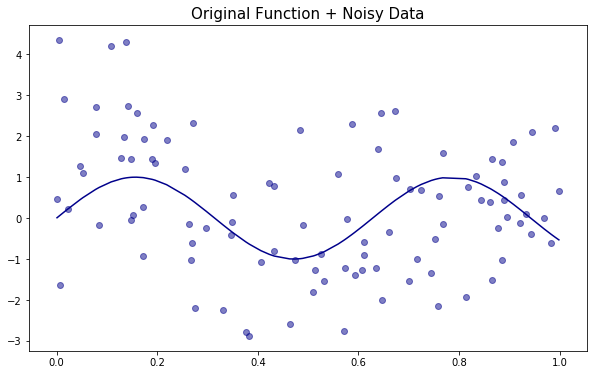

In [4]:
# plot original function and noisy data
X = sort(random(100))
y = asarray([objective(x) for x in X])
y_no_noise = [objective(x, noise=0) for x in X]
pyplot.scatter(sort(X), y, color='darkblue', alpha=0.5)
pyplot.plot(sort(X), y_no_noise, color='darkblue')
pyplot.title('Original Function + Noisy Data', size=15)
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


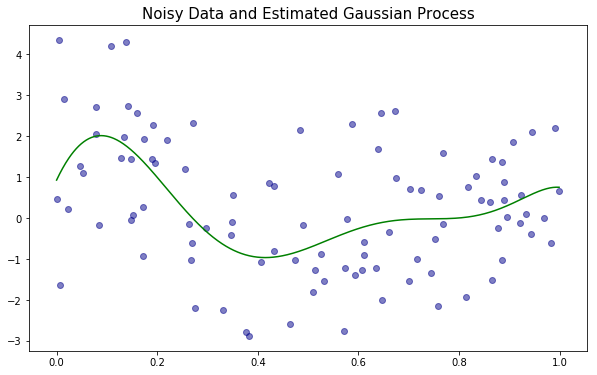

In [5]:
# plot before hand
# sample the domain sparsely with noise
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

model = GaussianProcessRegressor()
model.fit(X, y)

plot(X, y, model, title='Noisy Data and Estimated Gaussian Process')
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


0 0.0
0.8421934091034513 [[0.00650704]]
--
75 1.0
0.104170268866144 [[2.01291275]]
--
0 0.0
0.35043298998554906 [[0.08492661]]
--
0 0.0
-1.055885513865786 [[0.47199678]]
--
0 0.0
-0.24157020088694336 [[0.06928444]]
--
0 0.0
2.500460589311767 [[0.03679752]]
--
0 0.0
1.669094277321069 [[0.12574005]]
--
0 0.0
-0.8622177387668079 [[-0.88704109]]
--
47 1.0
0.009719486582874692 [[1.82757938]]
--
0 0.0
0.6787559745815117 [[0.23130798]]
--
79 1.0
-1.5129656063218748 [[1.68502188]]
--
0 0.0
1.4609990111795803 [[0.27099991]]
--
20 1.0
0.1758143041657606 [[1.4665947]]
--
0 0.0
-1.4738800944556496 [[-0.57977295]]
--
22 1.0
-0.6324255600384465 [[1.38663387]]
--
7 1.0
0.6147793181013143 [[1.27884293]]
--
0 0.0
-2.6031105969717974 [[0.81762791]]
--
90 0.3781597312850175
-0.5046346776176206 [[1.21768188]]
--
0 0.0
-2.6946866626240524 [[-0.30971336]]
--
71 1.1028175622615148e-153
2.79132440079372 [[1.11070251]]
--
0 0.0
-0.0877384381847478 [[0.1841259]]
--
5 4.0663722418011226e-88
-0.007362284117347601

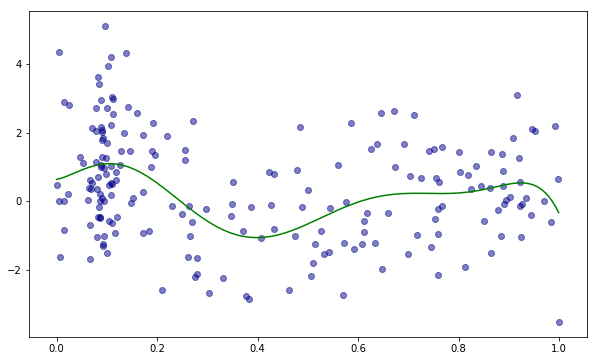

Best Result: x=0.096, y=5.116


In [7]:


# perform the optimization process
for _ in range(100):
    # select the next point to sample
    x = opt_acquisition(X, model)
    # sample the point
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print(actual, est)
    print('--')
    
    #print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual]]))

    # update the model
    model.fit(X, y)

# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

In [11]:
random(100)

array([0.78114961, 0.51513214, 0.86081563, 0.05740937, 0.50409513,
       0.6562157 , 0.35053861, 0.00343289, 0.04237161, 0.44731563,
       0.09769251, 0.96579019, 0.135237  , 0.54153705, 0.62083458,
       0.67934834, 0.11704816, 0.04708072, 0.55702038, 0.61883111,
       0.336032  , 0.74193322, 0.6937294 , 0.09169795, 0.70522695,
       0.54903299, 0.79587331, 0.60474292, 0.79253919, 0.94396294,
       0.62731891, 0.68416269, 0.26311652, 0.85301667, 0.61633055,
       0.75992181, 0.0118304 , 0.87006913, 0.38019526, 0.64221616,
       0.89766707, 0.5562491 , 0.71346589, 0.73961823, 0.48821361,
       0.53971686, 0.59405702, 0.71197379, 0.02442817, 0.61118761,
       0.00450861, 0.42132459, 0.48680909, 0.47531011, 0.25123913,
       0.93735513, 0.74641651, 0.01390855, 0.39203173, 0.88576264,
       0.45064378, 0.11714623, 0.38132218, 0.38488715, 0.00946344,
       0.26541274, 0.68193619, 0.30565666, 0.43831785, 0.06893539,
       0.52975707, 0.42911806, 0.15086138, 0.26470511, 0.40286